# Rappi Data Science Challenge

In this notebook you can find my solution for the Data Science Rappi Challenge. It is structure as follows:
- EDA
- Customer Segmentation
- Modeling

## EDA

Before doing any further analysis lets first start understanding a little of the data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ds_challenge_data.csv')

In [3]:
df.head(10)

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'ANDR...",Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False
2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': '.'}",NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False
3,1,F,767.005387,2020-01-05,11,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False
4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False
5,1,F,37.003747,2020-01-27,3,"{'model': 2020, 'device_score': 2, 'os': '%%'}",NaN,Guadalajara,Física,94000,56,Rechazada,False,0.000000,0.370037,False
6,1,F,334.516017,2020-01-06,2,"{'model': 2020, 'device_score': 1, 'os': '%%'}",Abarrotes,Guadalajara,Física,94000,56,Aceptada,False,33.451602,3.010644,False
7,1,F,322.264405,2020-01-11,13,"{'model': 2020, 'device_score': 4, 'os': '%%'}",MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,3.222644,False
8,1,F,911.797804,2020-01-19,3,"{'model': 2020, 'device_score': 3, 'os': '.'}",Abarrotes,Guadalajara,Virtual,94000,56,Aceptada,False,91.179780,16.412360,False
9,2,F,160.095187,2020-01-08,2,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",NaN,Toluca,Física,55000,57,Aceptada,False,16.009519,1.440857,False


By just looking into the first 10 records of the dataset it can be seen that *establecimiento* has missing values, so lets first look to all the missing values. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26975 entries, 0 to 26974
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_USER          26975 non-null  int64  
 1   genero           26975 non-null  object 
 2   monto            26975 non-null  float64
 3   fecha            26975 non-null  object 
 4   hora             26975 non-null  int64  
 5   dispositivo      26975 non-null  object 
 6   establecimiento  16856 non-null  object 
 7   ciudad           15297 non-null  object 
 8   tipo_tc          26975 non-null  object 
 9   linea_tc         26975 non-null  int64  
 10  interes_tc       26975 non-null  int64  
 11  status_txn       26975 non-null  object 
 12  is_prime         26975 non-null  bool   
 13  dcto             26975 non-null  float64
 14  cashback         26975 non-null  float64
 15  fraude           26975 non-null  bool   
dtypes: bool(2), float64(3), int64(4), object(7)
memory usage: 

In [5]:
df.isna().sum()

ID_USER                0
genero                 0
monto                  0
fecha                  0
hora                   0
dispositivo            0
establecimiento    10119
ciudad             11678
tipo_tc                0
linea_tc               0
interes_tc             0
status_txn             0
is_prime               0
dcto                   0
cashback               0
fraude                 0
dtype: int64

There are 26975 records with 16 columns. Only 2 columns present missing value which are *establecimiento* and *ciudad*, these columns have more than 1/3 of missing values. The missing values in both columns will be fill as 'Unknown'.

In [6]:
df[['establecimiento', 'ciudad']]=df[['establecimiento', 'ciudad']].fillna('Unknown')

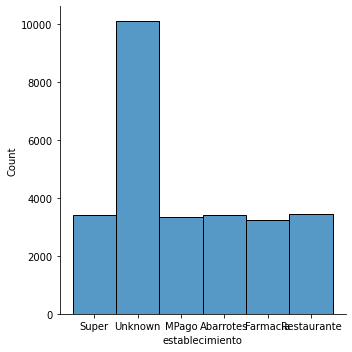

In [7]:
sns.displot(df['establecimiento'])

Here it can be seen that the Unknown category in *establecimiento* is the dominant, while the rest of categories have the same distribution. 

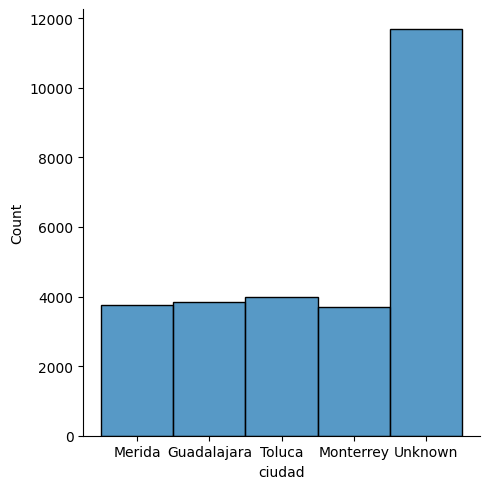

In [8]:
sns.displot(df['ciudad'])

In the case of city is pretty much the same, the *Unknown* category has more records than the others. The rest of cities have the same distribution. 

In [9]:
df['genero'].unique()

array(['F', '--', 'M'], dtype=object)

In [10]:
df['tipo_tc'].unique()

array(['Física', 'Virtual'], dtype=object)

In [11]:
df['status_txn'].unique()

array(['Aceptada', 'En proceso', 'Rechazada'], dtype=object)

The *genero* variable can take 3 different values, lets change '--' to Unknown just to keep the same structure as the other variables. 

In [12]:
df['genero'].replace('--', 'Unknown', inplace=True)

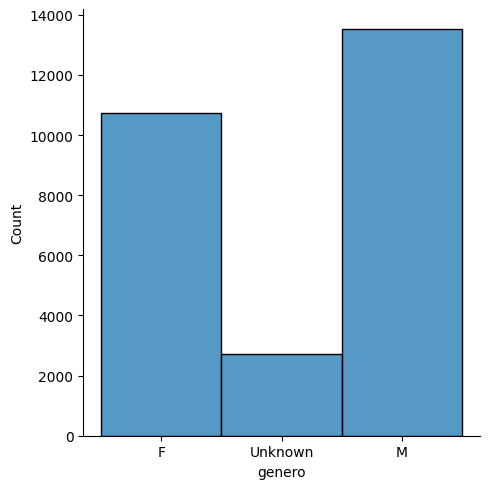

In [13]:
sns.displot(df['genero'])

There are more male in the dataset, while the the Unknown category is the one with less records. 

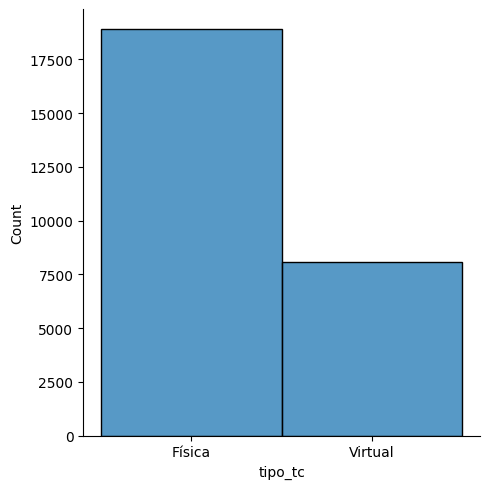

In [14]:
sns.displot(df['tipo_tc'])

There are more virtual cards compare to the physical ones. 

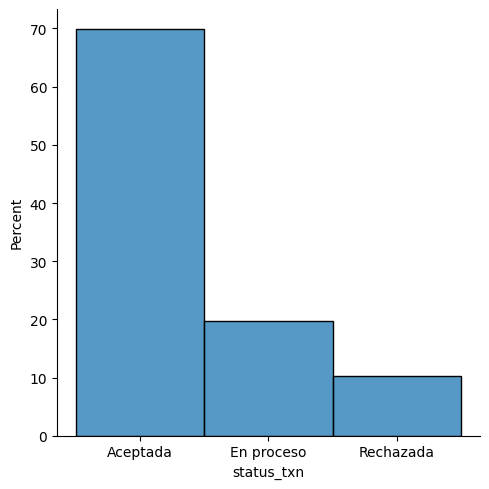

In [15]:
sns.displot(df['status_txn'], stat='percent')

Most of the the transactions are accepted, while almost 20% of are in process and only 10% are rejected. 

Before checking somo statistics from the other variables, lets change the *is_prime* and *fraude* variables into 0 and 1 to handle it better. 

In [16]:
df['is_prime']=df['is_prime'].astype(int)
df['fraude']=df['fraude'].astype(int)

In [17]:
sum(df['fraude'])/len(df)

0.030027803521779424

In [18]:
sum(df['is_prime'])/len(df)

0.13193697868396664

The dataset is clearly unbalanced as there is only 3% of fraud transactions. There is also an unbalanced in the *is_prime* variable as there are only 13% of prime users.

In [19]:
df.describe()

,ID_USER,monto,hora,linea_tc,interes_tc,is_prime,dcto,cashback,fraude
count,26975.000000,26975.000000,26975.000000,26975.000000,26975.000000,26975.000000,26975.000000,26975.000000,26975.000000
mean,2003.765412,499.069493,11.987618,62476.811863,48.224875,0.131937,17.466134,6.261186,0.030028
std,1144.630736,289.309518,6.642565,21886.892902,9.587256,0.338429,34.334566,4.458440,0.170667
min,0.000000,0.017303,1.000000,25000.000000,32.000000,0.000000,0.000000,0.000138,0.000000
25%,1041.000000,246.521227,6.000000,44000.000000,40.000000,0.000000,0.000000,2.791740,0.000000
50%,2006.000000,500.501022,12.000000,62000.000000,48.000000,0.000000,0.000000,5.636711,0.000000
75%,2973.500000,749.598192,18.000000,82000.000000,57.000000,0.000000,18.770710,8.531604,0.000000
max,3999.000000,999.917764,23.000000,99000.000000,64.000000,1.000000,199.356251,19.991582,1.000000


It looks like both *dcto* and *cashback* have outliers as there is an important gap between the third quantile and the maximum. The rest of variables do not seem to have any important outliers.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dcto'>

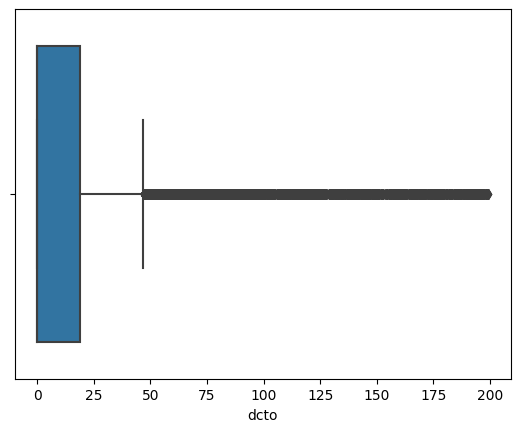

In [20]:
sns.boxplot(df['dcto'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dcto', ylabel='Density'>

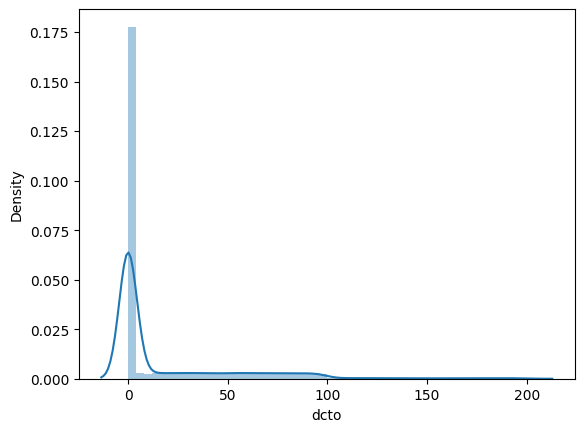

In [21]:
sns.distplot(df['dcto'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cashback'>

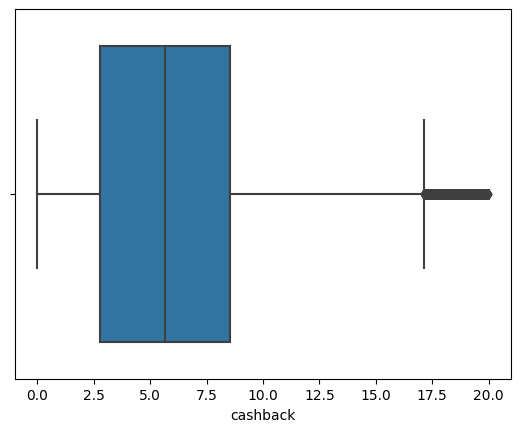

In [22]:
sns.boxplot(df['cashback'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cashback', ylabel='Density'>

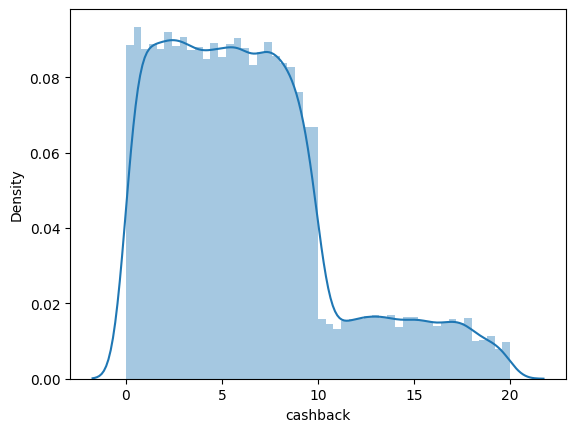

In [23]:
sns.distplot(df['cashback'])

Now lets see if there is any relevant difference between the distribution of the fraud transactions. 

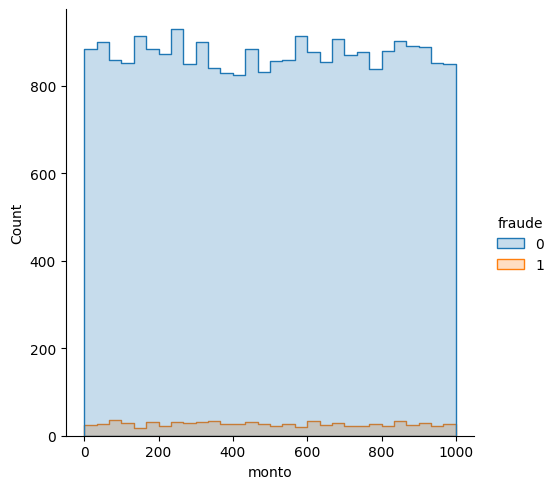

In [24]:
sns.displot(df, x='monto', hue='fraude', element='step')

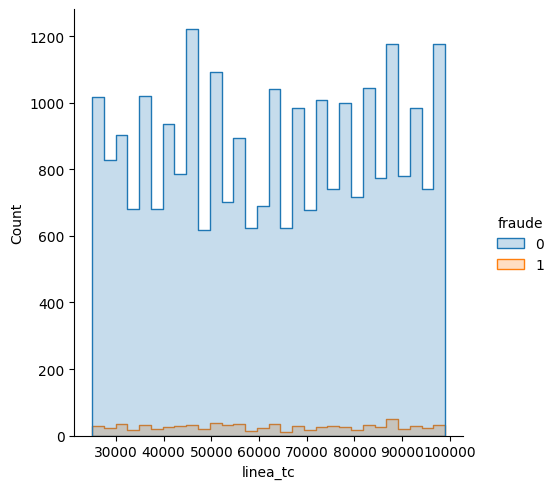

In [25]:
sns.displot(df, x='linea_tc', hue='fraude', element='step')

<AxesSubplot:xlabel='establecimiento', ylabel='Count'>

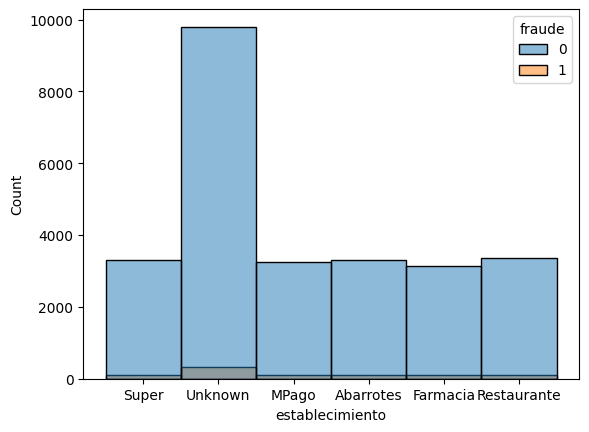

In [26]:
sns.histplot(df, x='establecimiento', hue='fraude')

<AxesSubplot:xlabel='tipo_tc', ylabel='Count'>

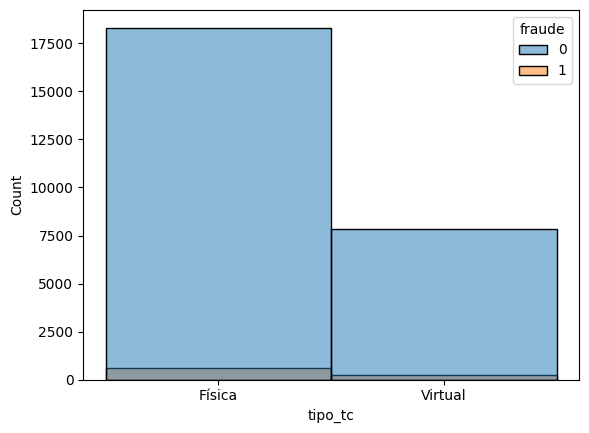

In [27]:
sns.histplot(df, x='tipo_tc', hue='fraude')

<AxesSubplot:xlabel='status_txn', ylabel='Count'>

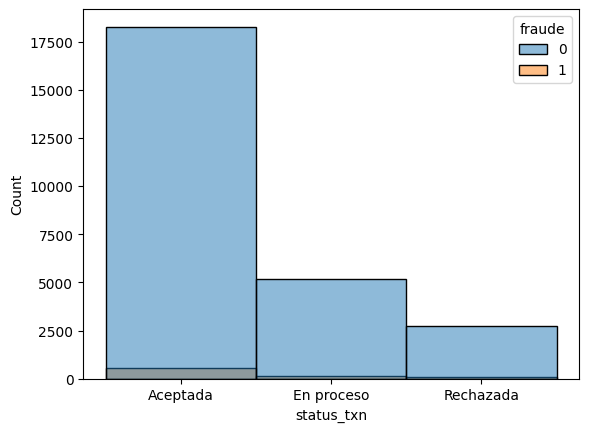

In [28]:
sns.histplot(df, x='status_txn', hue='fraude')

<AxesSubplot:xlabel='ciudad', ylabel='Count'>

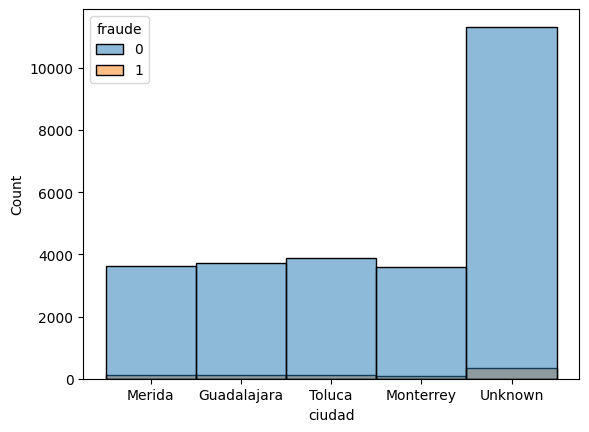

In [29]:
sns.histplot(df, x='ciudad', hue='fraude')


Here it can be seen that regardless of the city, the txn status, type of card, or the place there is no clear pattern that can help us to identify the fraud transactions.

The column *dispositivo* has the information of the divice in which the transaction was done, so lets get all this data into new variables

In [30]:
def get_dispositivo(x):
    disp_year=[]
    device_score=[]
    os=[]
    for i in range (len(x)):
        info_disp= x[i][1:-1]
        raw_data = dict(subString.split(":") for subString in info_disp.split(","))
        values =raw_data.values()
        values=list(values)
        disp_year.append(int(values[0]))
        device_score.append(int(values[1]))
        os.append(str(values[2][2:-1]))
    
    return disp_year, device_score, os

In [31]:
disp_year, device_score, os= get_dispositivo(df['dispositivo'])

In [32]:
df['disp_year']=disp_year
df['device_score']=device_score
df['os']=os

In [33]:
df

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,disp_year,device_score,os
0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'ANDR...",Super,Merida,Física,71000,51,Aceptada,0,60.834563,5.475111,0,2020,3,ANDROID
1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",Unknown,Merida,Virtual,71000,51,Aceptada,0,0.000000,1.774385,0,2020,1,ANDROID
2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': '.'}",Unknown,Guadalajara,Virtual,94000,56,En proceso,0,0.000000,15.800753,0,2020,1,.
3,1,F,767.005387,2020-01-05,11,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",MPago,Guadalajara,Física,94000,56,Aceptada,0,0.000000,7.670054,0,2020,3,WEB
4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",Unknown,Guadalajara,Física,94000,56,Aceptada,0,0.000000,2.541711,0,2020,3,%%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3999,M,746.192089,2020-01-08,13,"{'model': 2020, 'device_score': 2, 'os': 'ANDR...",Unknown,Toluca,Física,40000,56,Aceptada,0,0.000000,7.461921,0,2020,2,ANDROID
26971,3999,M,941.804966,2020-01-14,15,"{'model': 2020, 'device_score': 2, 'os': 'WEB'}",Unknown,Toluca,Física,40000,56,Aceptada,0,0.000000,9.418050,0,2020,2,WEB
26972,3999,M,251.189885,2020-01-16,11,"{'model': 2020, 'device_score': 2, 'os': 'WEB'}",Unknown,Toluca,Virtual,40000,56,Aceptada,0,0.000000,5.023798,0,2020,2,WEB
26973,3999,M,24.182665,2020-01-13,17,"{'model': 2020, 'device_score': 5, 'os': '.'}",Unknown,Toluca,Física,40000,56,Aceptada,0,2.418266,0.217644,0,2020,5,.


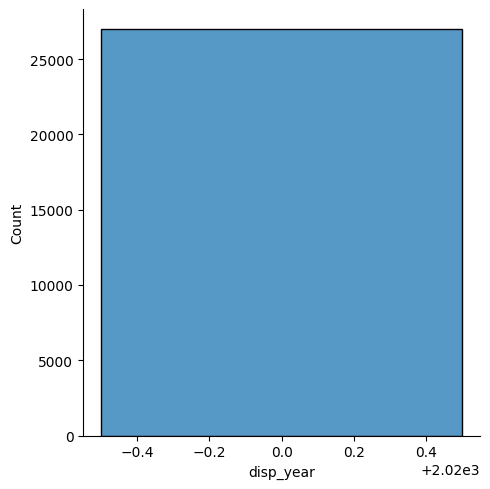

In [34]:
sns.displot(df['disp_year'])

The variable of the year of the device is the same for all the records, so it does not gives us any relevant information, therefore is better to drop it.

In [35]:
df=df.drop(columns='disp_year')

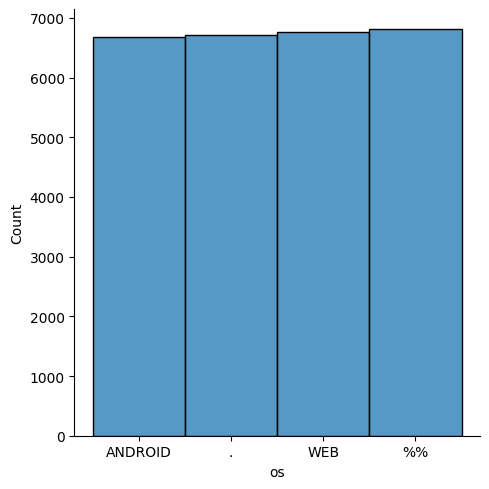

In [36]:
sns.displot(df['os'])

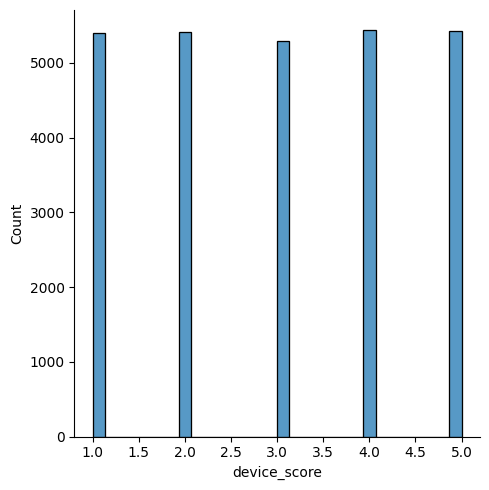

In [37]:
sns.displot(df['device_score'])

In the case of operating system and device score, both variables have a uniform distribution. 

/var/folders/fv/2gylwrw54ws8q4yb_3jzj6j80000gn/T/ipykernel_54193/7632736.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

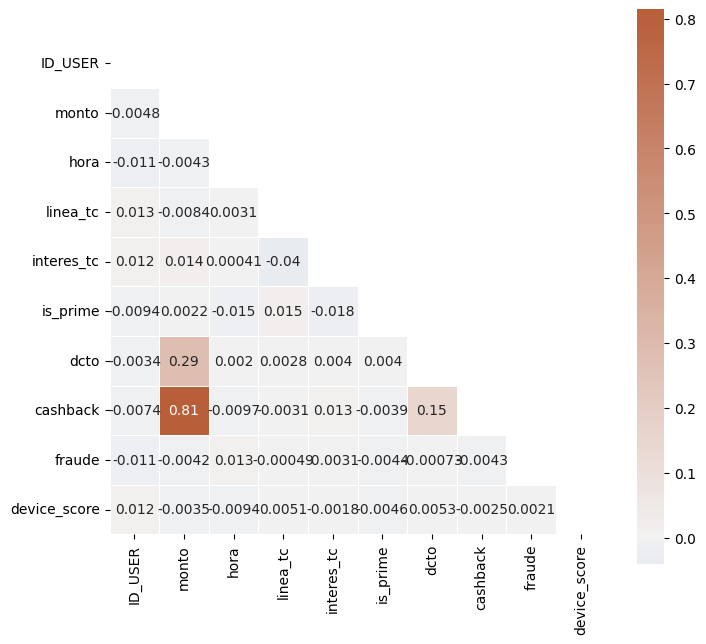

In [38]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

With the correlation matrix, it can be seen that *cashback* has a positive correlation with *monto* which makes sense. The same happens with *dcto* and *monto* that have a positive correlation as expected. In the other hand, the variable with the higher correlation with *fraude* is *hora*. So lets take a deep look into that.

In [39]:
fraud_rate = df.groupby([(df.hora)])[['fraude']].agg(Records=('fraude', 'count'), Frauds=('fraude', 'sum'))
fraud_rate['Fraud_rate']=fraud_rate['Frauds']/fraud_rate['Records']*100
fraud_rate.style.bar('Fraud_rate')

,Records,Frauds,Fraud_rate
hora,,,
1,1190,32,2.689076
2,1162,31,2.667814
3,1163,30,2.579536
4,1176,32,2.721088
5,1205,27,2.240664
6,1202,30,2.495840
7,1227,48,3.911980
8,1146,33,2.879581
9,1109,35,3.155996


It seems that at 23:00 there are more frauds, compare to other hours. From 17:00 the frauds tent to rise compare to the morning, but at 7:00 there is peak.
Now lets check if there is any relevant information from the users.

In [40]:
user = df.groupby([(df.ID_USER)])[['fraude']].agg(Records=('fraude', 'count'), Frauds=('fraude', 'sum'))
user['Fraud_rate']=user['Frauds']/user['Records']
user=user.sort_values(by=['Fraud_rate', 'Records'], ascending=False)
user.head(30)

,Records,Frauds,Fraud_rate
ID_USER,,,
3756,2,2,1.000000
140,1,1,1.000000
171,1,1,1.000000
646,1,1,1.000000
783,1,1,1.000000
1046,1,1,1.000000
1090,1,1,1.000000
1657,1,1,1.000000
1873,1,1,1.000000


In [41]:
user.describe()

,Records,Frauds,Fraud_rate
count,4000.00000,4000.000000,4000.000000
mean,6.74375,0.202500,0.028964
std,6.18281,0.492498,0.094606
min,1.00000,0.000000,0.000000
25%,2.00000,0.000000,0.000000
50%,5.00000,0.000000,0.000000
75%,9.00000,0.000000,0.000000
max,62.00000,4.000000,1.000000


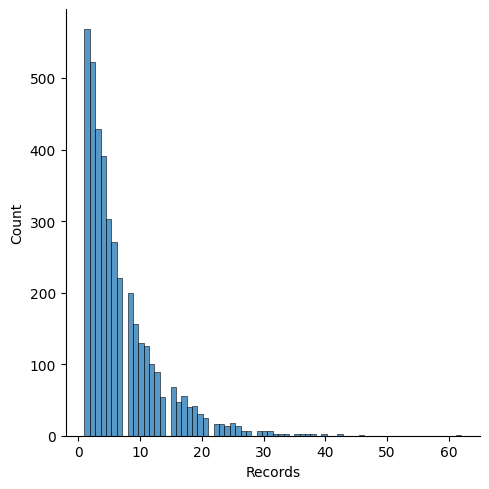

In [42]:
sns.displot(user['Records'])

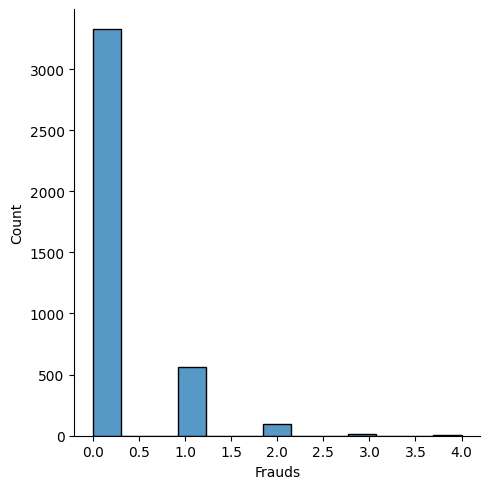

In [43]:
sns.displot(user['Frauds'])

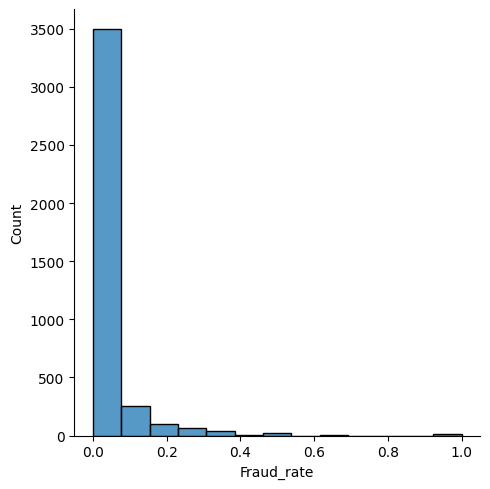

In [44]:
sns.displot(user['Fraud_rate'])

The distributions of the users transactions, frauds and fraud_rate are exponential and look similar. The mean of transactions per user is around 6. The users with the higher fraud rate are the ones with less transactions, this something that was expected.

## Customer Segmentation

Now lets find out is the any segmentation that can be find for the customers. For this it will be applied K-means to the dataset. 

In [45]:

X=df.drop(columns={"genero","dispositivo", "establecimiento", "ciudad", "tipo_tc", "status_txn", "fecha", "os", 'fraude','is_prime', 'device_score'})

In [46]:
X=X.set_index('ID_USER')

In [47]:
X

,monto,hora,linea_tc,interes_tc,dcto,cashback
ID_USER,,,,,,
0,608.345634,20,71000,51,60.834563,5.475111
0,88.719243,7,71000,51,0.000000,1.774385
1,790.037653,11,94000,56,0.000000,15.800753
1,767.005387,11,94000,56,0.000000,7.670054
1,254.171053,10,94000,56,0.000000,2.541711
...,...,...,...,...,...,...
3999,746.192089,13,40000,56,0.000000,7.461921
3999,941.804966,15,40000,56,0.000000,9.418050
3999,251.189885,11,40000,56,0.000000,5.023798


In [48]:
from sklearn.cluster import KMeans

In [49]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(X)
    wcss.append(kmeans_pca.inertia_)

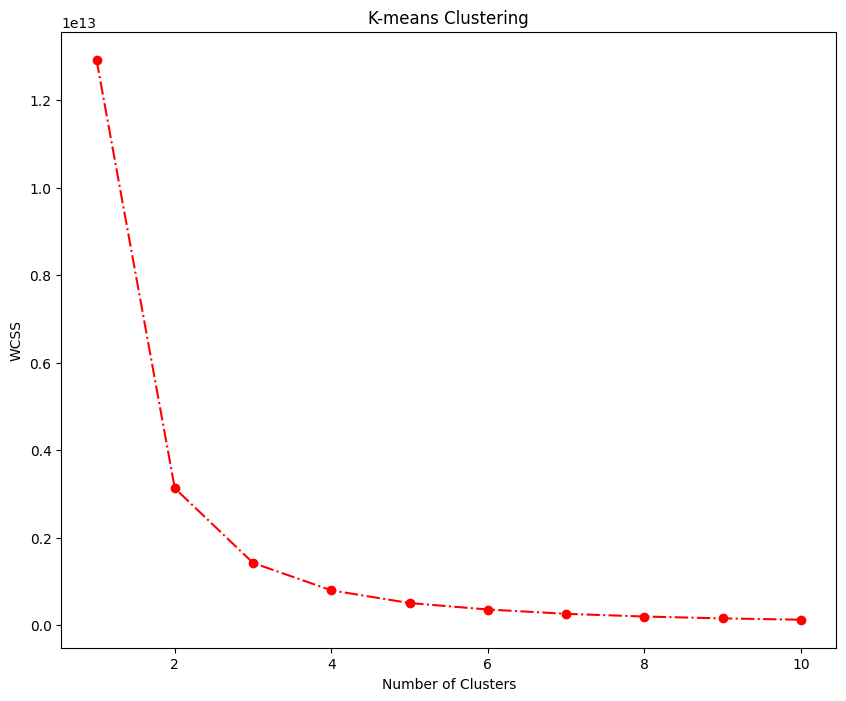

In [50]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

From the elbow graph it can be seen that 3 clusters is the optimal value of clusters for the customers. 

In [51]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [52]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [53]:
df_segm_kmeans= X.copy()
X["Segment K-means"] = kmeans.labels_

In [54]:
X.groupby(['Segment K-means']).mean()

,monto,hora,linea_tc,interes_tc,dcto,cashback
Segment K-means,,,,,,
0,498.876423,11.943837,61899.186047,48.209651,17.238142,6.222207
1,501.936023,11.997432,37098.358825,48.729932,17.379868,6.296022
2,496.519576,12.018263,87140.475685,47.758441,17.756368,6.263647


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


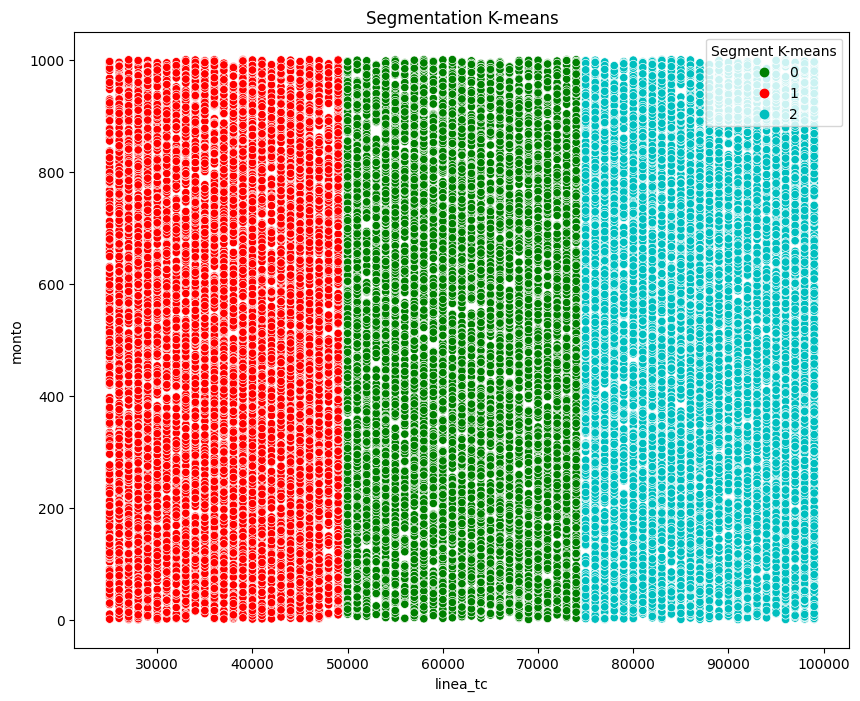

In [55]:
x_axis = X['linea_tc']
y_axis = X['monto']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = X['Segment K-means'], palette = ['g', 'r', 'c'])
plt.title('Segmentation K-means')
plt.show()

One way to make the segmentation of customers could be from the *linea_tc* that they have. Here is shown that the first cluster is the is for those customers that have less than 50,000, while the second have something between 50,000 and 75,000. The last cluster are those customers with the higher *linea_tc* starting form 75,000.

## Modeling

Before starting the modeling lets create some dummy variables for all the categorical columns that are on the dataset. For each column will be created n-1 dummy variables, this means that if a column can have 4 different categories there will only be 3 dummy variables. 

In [56]:
df_dummies = pd.get_dummies(df[['genero', 'establecimiento', 'ciudad', 'tipo_tc', 'status_txn', 'os']], drop_first=True)

In [60]:
df_dummies.head(10)

,genero_M,genero_Unknown,establecimiento_Farmacia,establecimiento_MPago,establecimiento_Restaurante,establecimiento_Super,establecimiento_Unknown,ciudad_Merida,ciudad_Monterrey,ciudad_Toluca,ciudad_Unknown,tipo_tc_Virtual,status_txn_En proceso,status_txn_Rechazada,os_.,os_ANDROID,os_WEB
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
9,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1


In [61]:
df_cat= pd.concat([df, df_dummies], axis=1)

In [62]:
df_cat.head(10)

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,...,ciudad_Merida,ciudad_Monterrey,ciudad_Toluca,ciudad_Unknown,tipo_tc_Virtual,status_txn_En proceso,status_txn_Rechazada,os_.,os_ANDROID,os_WEB
0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'ANDR...",Super,Merida,Física,71000,...,1,0,0,0,0,0,0,0,1,0
1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",Unknown,Merida,Virtual,71000,...,1,0,0,0,1,0,0,0,1,0
2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': '.'}",Unknown,Guadalajara,Virtual,94000,...,0,0,0,0,1,1,0,1,0,0
3,1,F,767.005387,2020-01-05,11,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",MPago,Guadalajara,Física,94000,...,0,0,0,0,0,0,0,0,0,1
4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",Unknown,Guadalajara,Física,94000,...,0,0,0,0,0,0,0,0,0,0
5,1,F,37.003747,2020-01-27,3,"{'model': 2020, 'device_score': 2, 'os': '%%'}",Unknown,Guadalajara,Física,94000,...,0,0,0,0,0,0,1,0,0,0
6,1,F,334.516017,2020-01-06,2,"{'model': 2020, 'device_score': 1, 'os': '%%'}",Abarrotes,Guadalajara,Física,94000,...,0,0,0,0,0,0,0,0,0,0
7,1,F,322.264405,2020-01-11,13,"{'model': 2020, 'device_score': 4, 'os': '%%'}",MPago,Guadalajara,Física,94000,...,0,0,0,0,0,0,0,0,0,0
8,1,F,911.797804,2020-01-19,3,"{'model': 2020, 'device_score': 3, 'os': '.'}",Abarrotes,Guadalajara,Virtual,94000,...,0,0,0,0,1,0,0,1,0,0
9,2,F,160.095187,2020-01-08,2,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",Unknown,Toluca,Física,55000,...,0,0,1,0,0,0,0,0,0,1


For the modeling lets try **Decision Tree**, **Random Forest**, **Logistic Regression**, **CatBoost** and **XGBoost**. As the dataset is unbalanced, there is no point in setting accuracy as the main metric, therefore to select the best model it will be base on these metrics:
- Precision
- ROC AUC
- Training time

In [85]:
import time
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, roc_curve, classification_report
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold ,KFold

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
import catboost as cb
import optuna

In [73]:
Y=df_cat["fraude"]
X=df_cat.drop(columns={"genero","dispositivo", "establecimiento", "ciudad", "tipo_tc", "status_txn", "fecha", "os", 'fraude'})

In [74]:
X=X.set_index('ID_USER')

In [75]:
X['monto']=(X['monto']-X['monto'].mean(axis=0))/X['monto'].std(axis=0)
X['linea_tc']=(X['linea_tc']-X['linea_tc'].mean(axis=0))/X['linea_tc'].std(axis=0)
X['interes_tc']=(X['interes_tc']-X['interes_tc'].mean(axis=0))/X['interes_tc'].std(axis=0)
X['dcto']=(X['dcto']-X['dcto'].mean(axis=0))/X['dcto'].std(axis=0)
X['cashback']=(X['cashback']-X['cashback'].mean(axis=0))/X['cashback'].std(axis=0)
X['hora']=(X['hora']-X['hora'].mean(axis=0))/X['hora'].std(axis=0)

In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)


In [77]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [78]:
def run_model(model, X_train, Y_train, X_test, Y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,Y_train, verbose=0)
    else:
        model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, Y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(Y_test,Y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(Y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, Y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, time_taken

### Decision Tree

Accuracy = 0.9484708063021317
ROC Area under Curve = 0.4989456833396293
Time taken = 0.0463869571685791
              precision    recall  f1-score   support

           0    0.96545   0.98176   0.97354      5209
           1    0.03061   0.01613   0.02113       186

    accuracy                        0.94847      5395
   macro avg    0.49803   0.49895   0.49733      5395
weighted avg    0.93322   0.94847   0.94070      5395



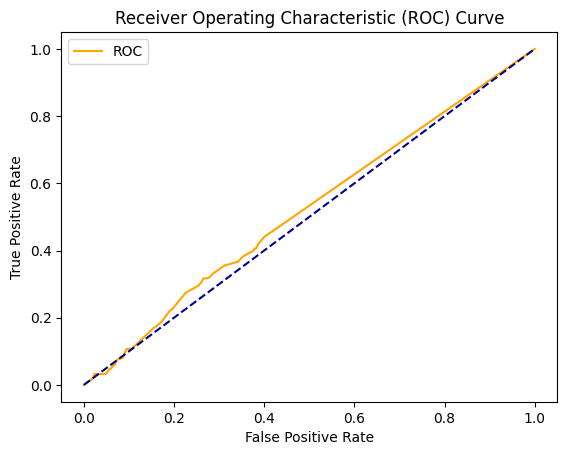

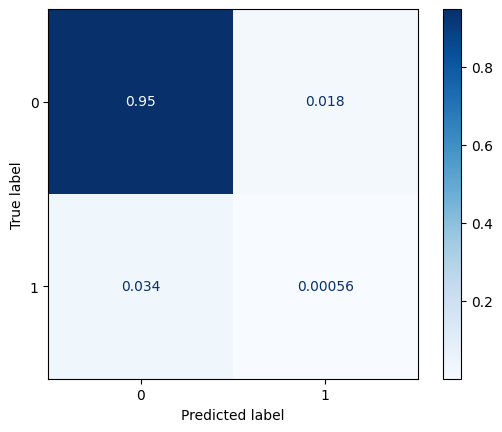

In [89]:
params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, Y_train, X_test, Y_test)

### Random Forest

Accuracy = 0.9655236329935125
ROC Area under Curve = 0.5
Time taken = 2.4613230228424072
              precision    recall  f1-score   support

           0    0.96552   1.00000   0.98246      5209
           1    0.00000   0.00000   0.00000       186

    accuracy                        0.96552      5395
   macro avg    0.48276   0.50000   0.49123      5395
weighted avg    0.93224   0.96552   0.94859      5395



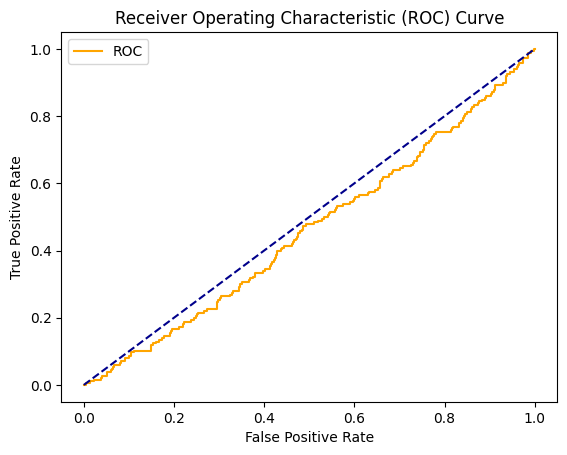

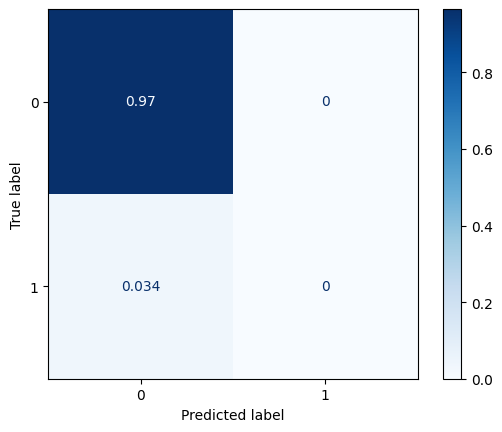

In [90]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, Y_train, X_test, Y_test)

### Logistic Regression

Accuracy = 0.9655236329935125
ROC Area under Curve = 0.5
Time taken = 0.543025016784668
              precision    recall  f1-score   support

           0    0.96552   1.00000   0.98246      5209
           1    0.00000   0.00000   0.00000       186

    accuracy                        0.96552      5395
   macro avg    0.48276   0.50000   0.49123      5395
weighted avg    0.93224   0.96552   0.94859      5395



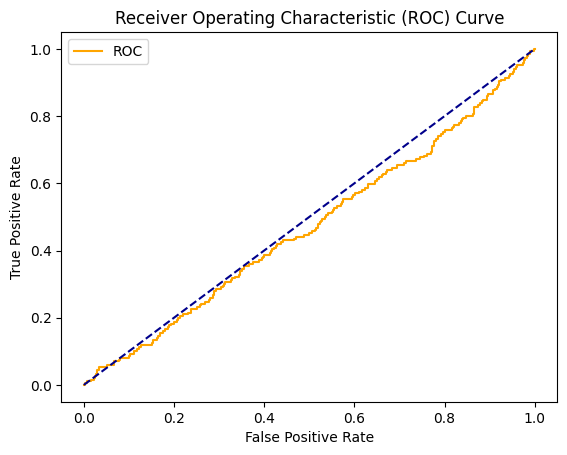

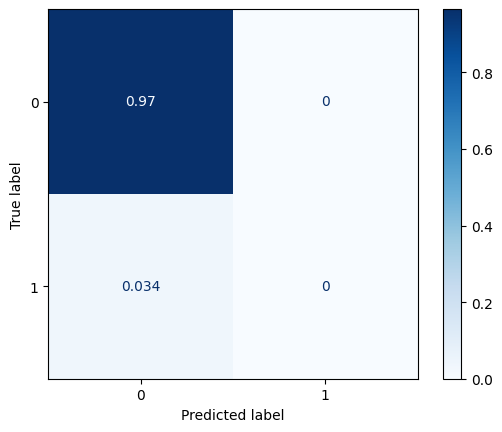

In [91]:
params_log ={'C': 1,
            'n_jobs': -1,
            'max_iter': 100000}

model_log = LogisticRegression(**params_log)
model_log, accuracy_log, roc_auc_log, tt_log = run_model(model_log, X_train, Y_train, X_test, Y_test)


### CatBoost

Accuracy = 0.9651529193697869
ROC Area under Curve = 0.49980802457285467
Time taken = 75.55477499961853
              precision    recall  f1-score   support

           0    0.96551   0.99962   0.98227      5209
           1    0.00000   0.00000   0.00000       186

    accuracy                        0.96515      5395
   macro avg    0.48276   0.49981   0.49113      5395
weighted avg    0.93222   0.96515   0.94840      5395



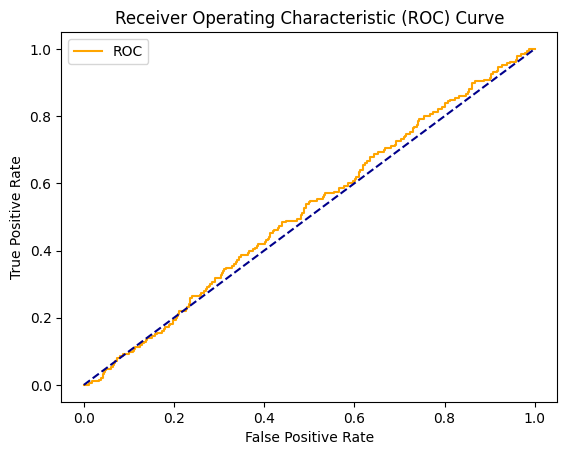

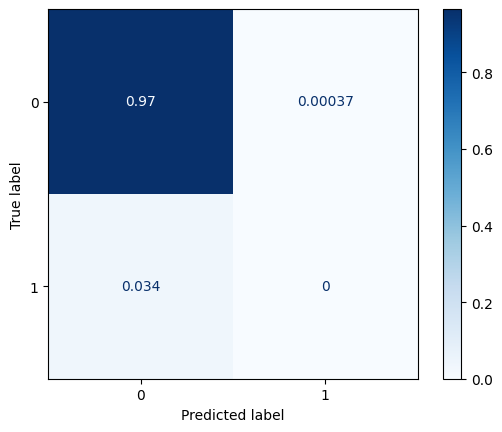

In [92]:
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, tt_cb = run_model(model_cb, X_train, Y_train, X_test, Y_test, verbose=False)

### XGBoost

Accuracy = 0.964967562557924
ROC Area under Curve = 0.499712036859282
Time taken = 18.008450746536255
              precision    recall  f1-score   support

           0    0.96550   0.99942   0.98217      5209
           1    0.00000   0.00000   0.00000       186

    accuracy                        0.96497      5395
   macro avg    0.48275   0.49971   0.49109      5395
weighted avg    0.93222   0.96497   0.94831      5395



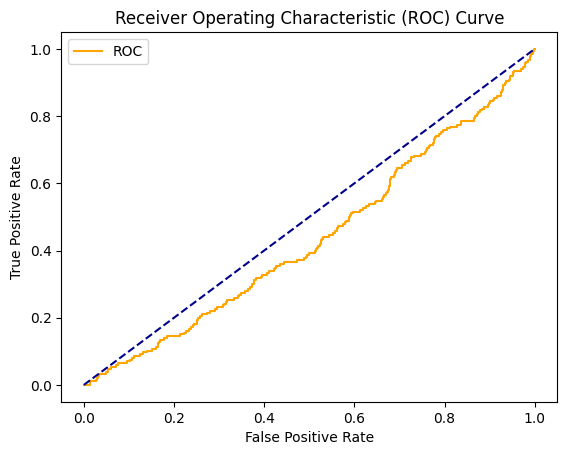

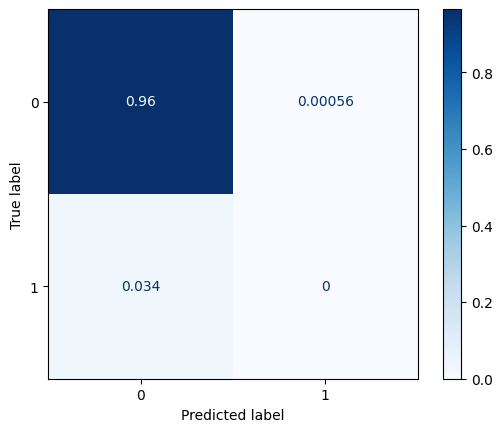

In [93]:
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, Y_train, X_test, Y_test)

### Comparison

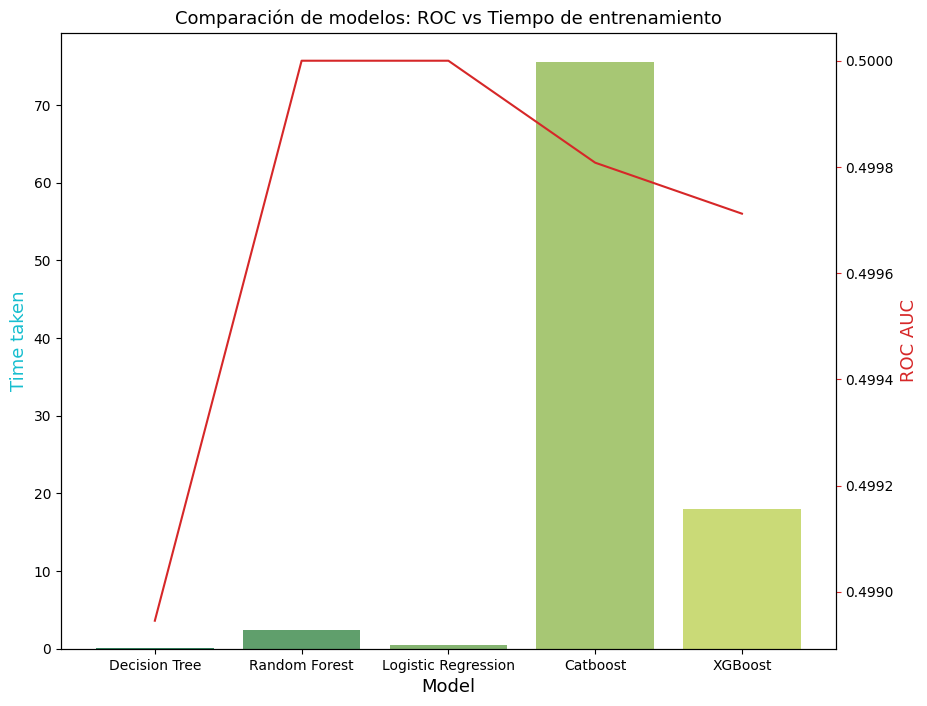

In [96]:
accuracy_scores = [accuracy_dt, accuracy_rf, accuracy_log, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_dt, roc_auc_rf, roc_auc_log, roc_auc_cb, roc_auc_xgb]
tt = [tt_dt, tt_rf, tt_log, tt_cb, tt_xgb]

model_data = {'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(10,8))
ax1.set_title('Comparación de modelos: ROC vs Tiempo de entrenamiento', fontsize=13)
color = 'tab:cyan'
ax1.set_xlabel('Modelo', fontsize=13)
ax1.set_ylabel('Tiempo de entrenamiento', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

Decision Tree was the quickest model to train, yet is the worst. The same happens with logistic Regression that has an AUC lower than 0.49. Despite the models have a higher accuracy all of them are useless to detect fraudsters as the best AUC is no more than 0.5. Therefore to solve the unbalanced data lets sample more data from the fraud transactions and retrain the model to improve the performance.

In [97]:
not_fraud = df_cat.loc[df_cat.fraude == 0].copy()
fraud = df_cat.loc[df_cat.fraude == 1].copy()

fraud_samples = fraud.sample(
                             replace=True, 
                             n=1200, 
                             random_state=42)  

df_sample = pd.concat([not_fraud, fraud_samples])

print(df_sample.fraude.value_counts())

0    26165
1     1200
Name: fraude, dtype: int64


In [98]:
Y=df_sample["fraude"]
X=df_sample.drop(columns={"fraude","genero","dispositivo", "establecimiento", "ciudad", "tipo_tc", "status_txn", "fecha", "os"})
X=X.set_index('ID_USER')
X['monto']=(X['monto']-X['monto'].mean(axis=0))/X['monto'].std(axis=0)
X['linea_tc']=(X['linea_tc']-X['linea_tc'].mean(axis=0))/X['linea_tc'].std(axis=0)
X['interes_tc']=(X['interes_tc']-X['interes_tc'].mean(axis=0))/X['interes_tc'].std(axis=0)
X['dcto']=(X['dcto']-X['dcto'].mean(axis=0))/X['dcto'].std(axis=0)
X['cashback']=(X['cashback']-X['cashback'].mean(axis=0))/X['cashback'].std(axis=0)
X['hora']=(X['hora']-X['hora'].mean(axis=0))/X['hora'].std(axis=0)


In [99]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)


### Decision Tree

Accuracy = 0.9576100858761192
ROC Area under Curve = 0.7451854147315548
Time taken = 0.02799391746520996
              precision    recall  f1-score   support

           0    0.97803   0.97766   0.97785      5237
           1    0.50840   0.51271   0.51055       236

    accuracy                        0.95761      5473
   macro avg    0.74322   0.74519   0.74420      5473
weighted avg    0.95778   0.95761   0.95770      5473



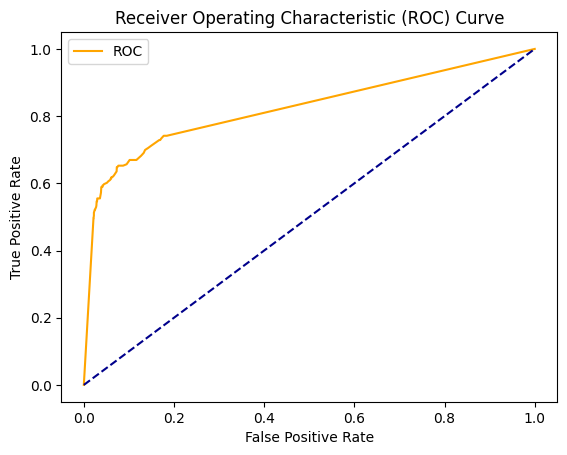

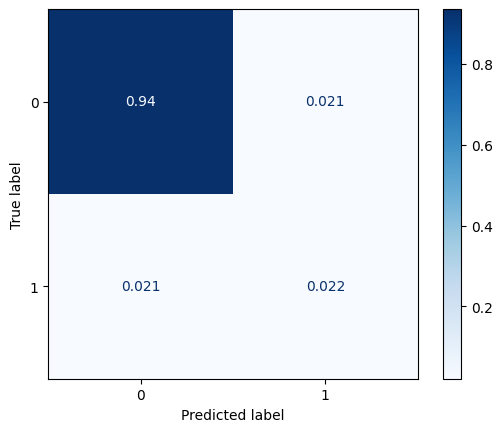

In [100]:
params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, Y_train, X_test, Y_test)

### Random Forest

Accuracy = 0.9727754430842317
ROC Area under Curve = 0.6843220338983051
Time taken = 1.6072611808776855
              precision    recall  f1-score   support

           0    0.97234   1.00000   0.98597      5237
           1    1.00000   0.36864   0.53870       236

    accuracy                        0.97278      5473
   macro avg    0.98617   0.68432   0.76234      5473
weighted avg    0.97353   0.97278   0.96669      5473



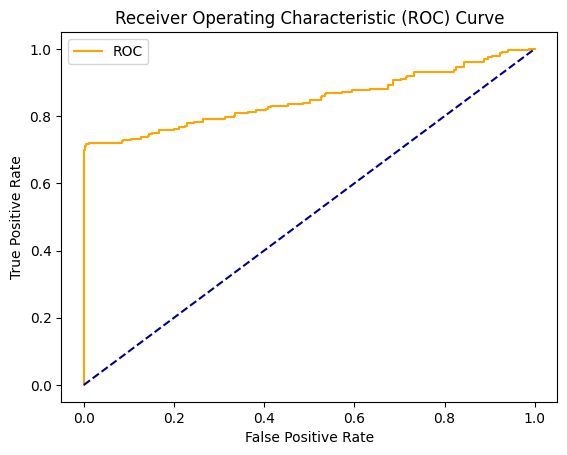

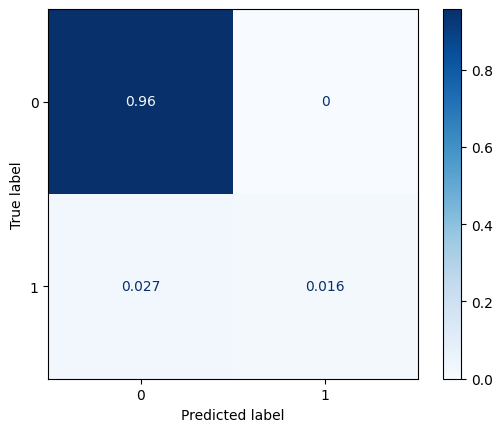

In [104]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, Y_train, X_test, Y_test)

### Logistic Regression

Accuracy = 0.9568792252877764
ROC Area under Curve = 0.5
Time taken = 0.38997888565063477
              precision    recall  f1-score   support

           0    0.95688   1.00000   0.97796      5237
           1    0.00000   0.00000   0.00000       236

    accuracy                        0.95688      5473
   macro avg    0.47844   0.50000   0.48898      5473
weighted avg    0.91562   0.95688   0.93579      5473



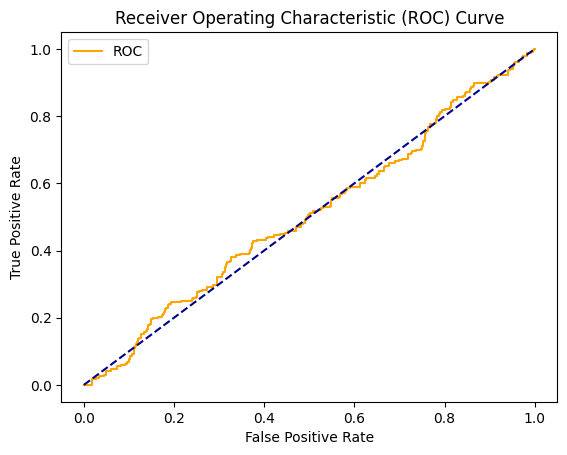

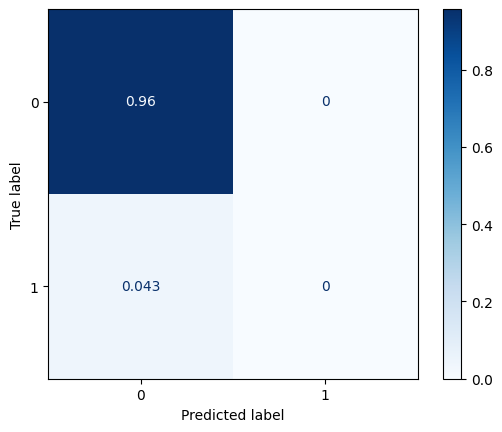

In [105]:
params_log ={'C': 1,
            'n_jobs': -1,
            'max_iter': 100000}

model_log = LogisticRegression(**params_log)
model_log, accuracy_log, roc_auc_log, tt_log = run_model(model_log, X_train, Y_train, X_test, Y_test)


### CatBoost

Accuracy = 0.9842864973506303
ROC Area under Curve = 0.8501673231213368
Time taken = 50.26354002952576
              precision    recall  f1-score   support

           0    0.98677   0.99694   0.99183      5237
           1    0.91209   0.70339   0.79426       236

    accuracy                        0.98429      5473
   macro avg    0.94943   0.85017   0.89304      5473
weighted avg    0.98355   0.98429   0.98331      5473



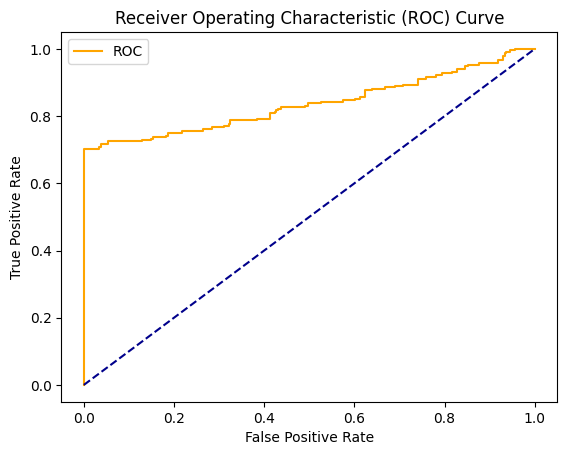

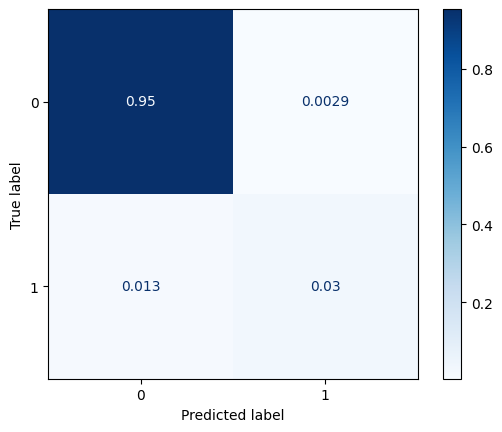

In [106]:
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, tt_cb = run_model(model_cb, X_train, Y_train, X_test, Y_test, verbose=False)

### XGBoost

Accuracy = 0.9872099397040015
ROC Area under Curve = 0.8516949152542372
Time taken = 9.614845752716064
              precision    recall  f1-score   support

           0    0.98681   1.00000   0.99336      5237
           1    1.00000   0.70339   0.82587       236

    accuracy                        0.98721      5473
   macro avg    0.99340   0.85169   0.90962      5473
weighted avg    0.98738   0.98721   0.98614      5473



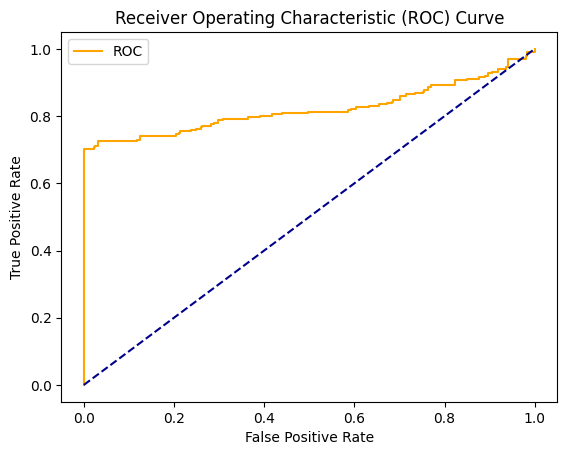

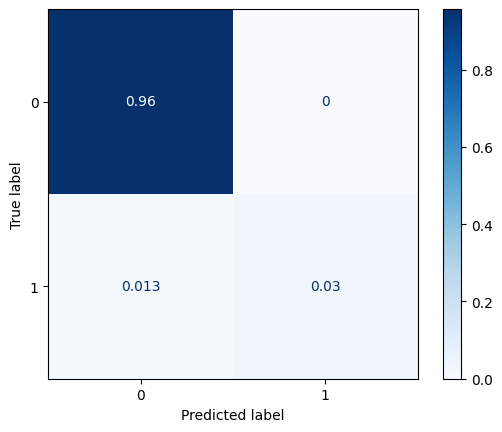

In [109]:
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, Y_train, X_test, Y_test)

### Comparison

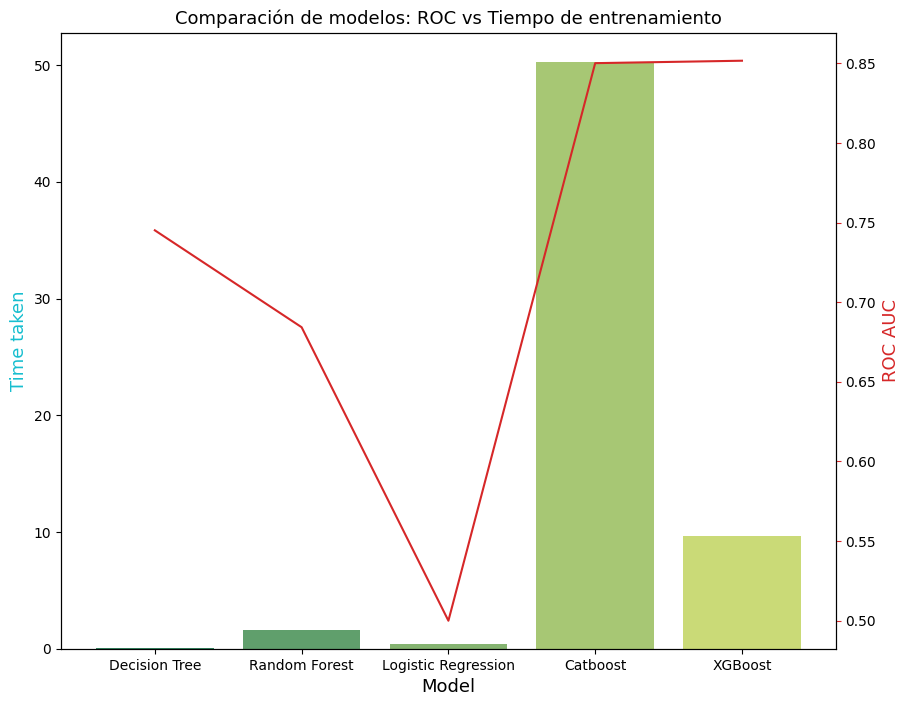

In [110]:
accuracy_scores = [accuracy_dt, accuracy_rf, accuracy_log, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_dt, roc_auc_rf, roc_auc_log, roc_auc_cb, roc_auc_xgb]
tt = [tt_dt, tt_rf, tt_log, tt_cb, tt_xgb]

model_data = {'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(10,8))
ax1.set_title('Comparación de modelos: ROC vs Tiempo de entrenamiento', fontsize=13)
color = 'tab:cyan'
ax1.set_xlabel('Modelo', fontsize=13)
ax1.set_ylabel('Tiempo de entrenamiento', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

It can be seen that **XGBoost** is by far the best model eventhough Catboost has a similar perfomance it takes less time to train the model which means is more efficient with the resources, it also has the best AUC. The approach of sampling more data from the fraud transactions helps the model to have a better performance yet it can be improve a lot more. 

Now that we have the right model that help us identify fraudsters lets look for the best hyperparameters using optuna. 

In [115]:
def objective_xgb(trial , data = X,Target=Y):
    
    params = {"n_estimators" : trial.suggest_int("n_estimators" , 100 , 15000),
             "max_depth" : trial.suggest_int("max_depth", 2,20),
             "eta": trial.suggest_float("learning_rate",0.005 ,0.2),
             "alpha": trial.suggest_float("reg_alpha" , 0.001 , 10 ),
             "lambda" : trial.suggest_float("reg_lambda" , 0.001 , 10),
             "booster": "gbtree",
             "random_state": 228,
             "eval_metric": "auc",
             }
    
    model  = XGBClassifier(**params)
    scores = []
    
    K = StratifiedKFold(n_splits=4,random_state=228 , shuffle=True)
    for i ,(train_idx , val_idx) in enumerate(K.split(X,Y)):
        X_train ,X_val = X.iloc[train_idx],X.iloc[val_idx]
        Y_train ,Y_val = Y.iloc[train_idx],Y.iloc[val_idx]
        pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "auc")
        model.fit(X_train,Y_train,eval_set=[(X_val,Y_val)],early_stopping_rounds=300 , verbose =False)
        
        train_prediction = model.predict_proba(X_train)[:,1]
        train_score = roc_auc_score(Y_train ,train_prediction)
        
        validate_prediction = model.predict_proba(X_val)[:,1]
        validate_score = roc_auc_score(Y_val , validate_prediction)
        scores.append((train_score , validate_score))
        
        print(f"Fold {i+1} | AUC : {validate_score} ")
    
    scores = pd.DataFrame(scores ,columns=["train Score" , "Validation Score"])
    return scores["Validation Score"].mean()

In [116]:
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb ,n_trials=10)
print("Numbers of finished trials : " , len(study_xgb.trials))
print("Best Trials : ", study_xgb.best_trial.params)
print("Best Values : " , study_xgb.best_value)

[I 2022-07-13 17:31:10,189] A new study created in memory with name: no-name-9a7553c7-e1b8-4eb8-a6be-4d02eec11faa


Fold 1 | AUC : 0.8580291450117192 
Fold 2 | AUC : 0.8395892575039494 
Fold 3 | AUC : 0.8499327319981655 


[I 2022-07-13 17:32:03,482] Trial 0 finished with value: 0.849304845239833 and parameters: {'n_estimators': 14205, 'max_depth': 13, 'learning_rate': 0.1202099937182956, 'reg_alpha': 2.647983308993341, 'reg_lambda': 9.923593992715151}. Best is trial 0 with value: 0.849304845239833.


Fold 4 | AUC : 0.8496682464454978 
Fold 1 | AUC : 0.8743044940385203 
Fold 2 | AUC : 0.834151251082913 
Fold 3 | AUC : 0.861642715181165 


[I 2022-07-13 17:32:56,231] Trial 1 finished with value: 0.8568530816709714 and parameters: {'n_estimators': 1880, 'max_depth': 15, 'learning_rate': 0.15551529537738462, 'reg_alpha': 0.22755427279636048, 'reg_lambda': 4.677862049233139}. Best is trial 1 with value: 0.8568530816709714.


Fold 4 | AUC : 0.8573138663812873 
Fold 1 | AUC : 0.8596260063181493 
Fold 2 | AUC : 0.8374361718391683 
Fold 3 | AUC : 0.8593099933751209 


[I 2022-07-13 17:33:37,025] Trial 2 finished with value: 0.8511501952043653 and parameters: {'n_estimators': 11745, 'max_depth': 16, 'learning_rate': 0.08069237033136918, 'reg_alpha': 4.052607052645901, 'reg_lambda': 0.22874660868584876}. Best is trial 1 with value: 0.8568530816709714.


Fold 4 | AUC : 0.8482286092850226 
Fold 1 | AUC : 0.8413507591969837 
Fold 2 | AUC : 0.8216001630739438 
Fold 3 | AUC : 0.7955177597716965 


[I 2022-07-13 17:33:59,908] Trial 3 finished with value: 0.8226693286923815 and parameters: {'n_estimators': 14778, 'max_depth': 8, 'learning_rate': 0.09229723062700203, 'reg_alpha': 8.101071858754347, 'reg_lambda': 7.017989474449772}. Best is trial 1 with value: 0.8568530816709714.


Fold 4 | AUC : 0.8322086327269022 
Fold 1 | AUC : 0.8545638438805667 
Fold 2 | AUC : 0.8338923711970647 
Fold 3 | AUC : 0.8526397594659328 


[I 2022-07-13 17:34:21,539] Trial 4 finished with value: 0.8466096711571671 and parameters: {'n_estimators': 10588, 'max_depth': 17, 'learning_rate': 0.15037014245380095, 'reg_alpha': 6.314515991212791, 'reg_lambda': 0.5779895250472353}. Best is trial 1 with value: 0.8568530816709714.


Fold 4 | AUC : 0.8453427100851042 
Fold 1 | AUC : 0.7956909202078875 
Fold 2 | AUC : 0.77196402181114 
Fold 3 | AUC : 0.749419049075065 


[I 2022-07-13 17:35:46,697] Trial 5 finished with value: 0.7771389813896877 and parameters: {'n_estimators': 5177, 'max_depth': 5, 'learning_rate': 0.012275225085684521, 'reg_alpha': 6.768739608638753, 'reg_lambda': 7.128341350011232}. Best is trial 1 with value: 0.8568530816709714.


Fold 4 | AUC : 0.7914819344646588 
Fold 1 | AUC : 0.8618057678589626 
Fold 2 | AUC : 0.8390062681547165 
Fold 3 | AUC : 0.8588080313917341 


[I 2022-07-13 17:36:58,053] Trial 6 finished with value: 0.8541336006560722 and parameters: {'n_estimators': 14564, 'max_depth': 16, 'learning_rate': 0.038331135238209586, 'reg_alpha': 1.552867102785346, 'reg_lambda': 4.922953710996238}. Best is trial 1 with value: 0.8568530816709714.


Fold 4 | AUC : 0.8569143352188757 
Fold 1 | AUC : 0.837297462549679 
Fold 2 | AUC : 0.8228960913214085 
Fold 3 | AUC : 0.8074122203536667 


[I 2022-07-13 17:37:28,982] Trial 7 finished with value: 0.8243930350559593 and parameters: {'n_estimators': 8849, 'max_depth': 9, 'learning_rate': 0.055375665889550334, 'reg_alpha': 8.974882454846547, 'reg_lambda': 2.501348977988526}. Best is trial 1 with value: 0.8568530816709714.


Fold 4 | AUC : 0.8299663659990828 
Fold 1 | AUC : 0.8346479160297565 
Fold 2 | AUC : 0.8268621005962391 
Fold 3 | AUC : 0.8199617795444122 


[I 2022-07-13 17:37:44,853] Trial 8 finished with value: 0.8314281844806084 and parameters: {'n_estimators': 11029, 'max_depth': 7, 'learning_rate': 0.18830248334004718, 'reg_alpha': 6.702472246072837, 'reg_lambda': 9.733230893632442}. Best is trial 1 with value: 0.8568530816709714.


Fold 4 | AUC : 0.8442409417520257 
Fold 1 | AUC : 0.6738999286660552 
Fold 2 | AUC : 0.6357305203078021 
Fold 3 | AUC : 0.6183157519237629 


[I 2022-07-13 17:38:00,621] Trial 9 finished with value: 0.6476543889850431 and parameters: {'n_estimators': 14963, 'max_depth': 2, 'learning_rate': 0.11041930570170161, 'reg_alpha': 6.586458487474746, 'reg_lambda': 9.424558848084482}. Best is trial 1 with value: 0.8568530816709714.


Fold 4 | AUC : 0.6626713550425521 
Numbers of finished trials :  10
Best Trials :  {'n_estimators': 1880, 'max_depth': 15, 'learning_rate': 0.15551529537738462, 'reg_alpha': 0.22755427279636048, 'reg_lambda': 4.677862049233139}
Best Values :  0.8568530816709714


In [118]:
xgb_params = study_xgb.best_trial.params
xgb_params

{'n_estimators': 1880,
 'max_depth': 15,
 'learning_rate': 0.15551529537738462,
 'reg_alpha': 0.22755427279636048,
 'reg_lambda': 4.677862049233139}

Accuracy = 0.986296363968573
ROC Area under Curve = 0.8512175427127058
Time taken = 27.62082004547119
              precision    recall  f1-score   support

           0    0.98680   0.99905   0.99288      5237
           1    0.97076   0.70339   0.81572       236

    accuracy                        0.98630      5473
   macro avg    0.97878   0.85122   0.90430      5473
weighted avg    0.98611   0.98630   0.98524      5473



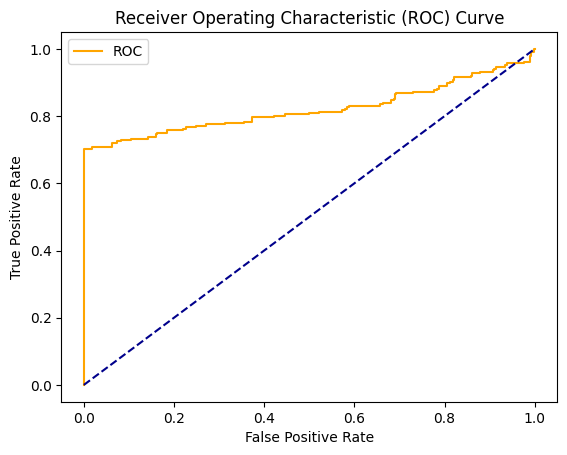

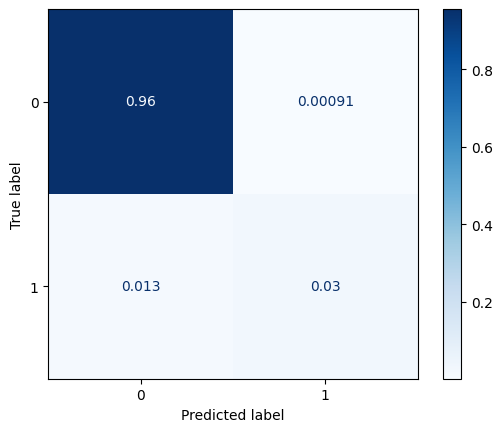

In [120]:
model_final = XGBClassifier(**xgb_params)
model_final, accuracy_final, roc_auc_final, tt_final = run_model(model_final, X_train, Y_train, X_test, Y_test)

### Feature Importance

Text(0.5, 0, 'Xgboost Feature Importance')

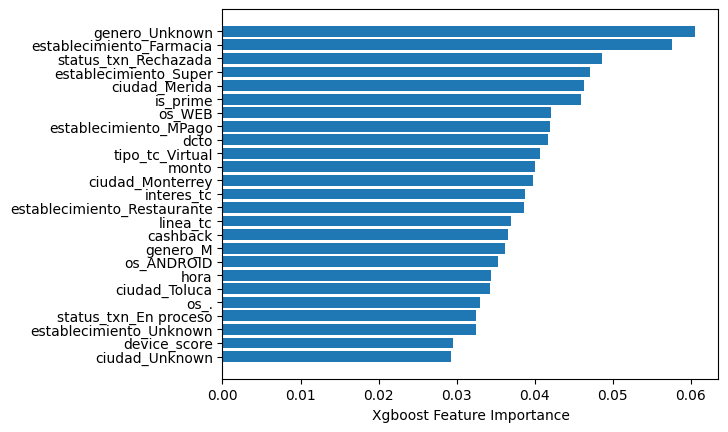

In [139]:
sorted_idx = model_final.feature_importances_.argsort()
plt.barh(a[sorted_idx], model_final.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

Here it can be seen the feature importance of the final model. The most important features are *genero_Unknown*, *establecimiento_Farmacia*, *status_txn_Rechazada*, which means that is more likely to classify a transaction as fraud when there is not information about the gender, when the transaction is declined and when the transaction is made on a Pharmacy. Those features that seem not to have an important impact on the model are *ciudad_Unknown*, *device_score* and *establecimiento_Unknown*.